In [1]:
#Name: Vinayak Gaikwad
#Student ID: 300137895
#COMP 381 - Summer 2018
#Term Project.

In [27]:
#I will be using a Communities and Crime Dataset taken from the UCI machine learning Repository.
#Link: https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime
#The dataset contains data collected from within United States. The data is a combination of data collected from 
#various data sources like US census, US LEMAS survey and the crime data from FBI UCR.

#I mainly plan to use regression algorithms like linear and logitic regression, polynomial regression and lasso. 
#I am considering KNN classification too.
    


In [2]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression
from sklearn.metrics import confusion_matrix, accuracy_score


%matplotlib inline
plt.style.use('seaborn-white')

In [3]:
df = pd.read_csv('C:/Users/Vinay/PycharmProjects/Project/communities.csv')
df.head()

,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,ViolentCrimesPerPop
0,8,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,...,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.20
1,53,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,...,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.67
2,24,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,...,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.43
3,34,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,...,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.12
4,42,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,...,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.03


In [4]:
X = df.drop(['state','communityname','ViolentCrimesPerPop'],axis = 1)
#print(df.dtypes)
#X.head()
Xtrain = X[0:1000]
Xtest = X[1000:]
y = df['ViolentCrimesPerPop']
ytrain= y[0:1000]
ytest = y[1000:]


In [5]:
#plt.scatter(Xt, yt,color='g')
#print(len(Xt))

#plt.xlim(0,0.16)
#plt.ylim(0,1)
#plt.show()

The MSE using all features is 0.02023605553621239


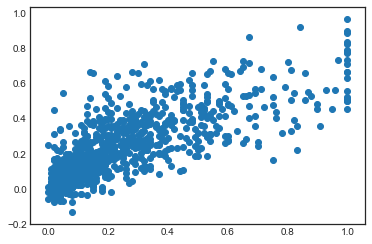

In [6]:
lm = LinearRegression()
lm.fit(Xtrain, ytrain)

preds_full = lm.predict(Xtest)
mse_full = mean_squared_error(ytest, preds_full)
print("The MSE using all features is %s" % mse_full)

plt.figure()
plt.scatter(ytest, preds_full)
plt.show()


In [7]:
# Redidual Sum of Squares
rss = sum((ytest - preds_full)**2)
print("RSS is",+rss)

# Mean Squared Error
mse = mean_squared_error(ytest, preds_full)
print("MSE is", +mse)

# R-squared
rs = r2_score(ytest, preds_full)
print("R-Squared value is", +rs)

RSS is 20.114639202995104
MSE is 0.02023605553621239
R-Squared value is 0.5960282965353734


In [10]:
perc = 50 # percentage of features to keep 

selector = SelectPercentile(f_regression, percentile=perc)
selector.fit_transform(Xtrain, ytrain)
selected_cols = selector.get_support()
selected_feas = Xtrain.columns.values[selected_cols]
print("These are the feas that were selected:\n")
print(selected_feas)

These are the feas that were selected:

['population' 'racepctblack' 'racePctWhite' 'racePctHisp' 'numbUrban'
 'medIncome' 'pctWWage' 'perCapInc' 'blackPerCap' 'HispPerCap'
 'NumUnderPov' 'PctPopUnderPov']


In [11]:

X_sub_train = Xtrain[selected_feas]
X_sub_test = Xtest[selected_feas]


The MSE using just the selected features is 0.020664897698242354


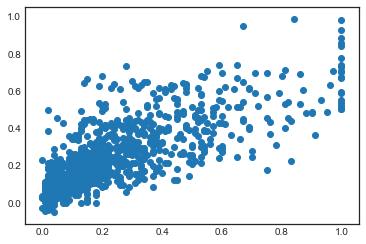

In [12]:
lm_sub = LinearRegression()
lm_sub.fit(X_sub_train, ytrain)

preds_sub = lm_sub.predict(X_sub_test)
mse_sub = mean_squared_error(ytest, preds_sub)
print("The MSE using just the selected features is %s" % mse_sub)

plt.figure()
plt.scatter(ytest, preds_sub)
plt.show()